In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('./'))))

from payoff import *

## 양매수

만기시 주가가 call 행사가보다 놉거나 put 행사가보다 낮아야 한다. 예측이 빗나가면 손실은 한정된다.

position 진입 이후에 아래든 위든 크게 주가가 움직여 주면 수익이 난다.

10만원 미만 옵션은 움직이는 속도 느리고 15 만원 이상되면 빠지는 것도 올라가는 것도 빠르다.

홀릭의 원칙:

1. 동시집입 / 동시청산

2. 함부로 계약 수를 늘리지 않는다.

3. 오랜시간 가지고 있을 수록 불리해진다.

4. 목표 수익금액과 손실금액을 정해 놓는다. (ex. 3 계약인 경우 최대 30만원 수익, 10 만원 손실)

Max Profit = 4,695,000.00
Max Loss = -2,055,000.00


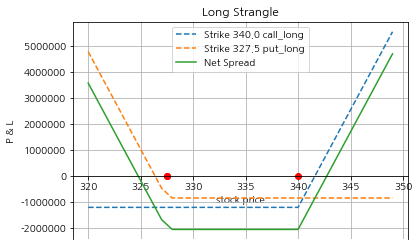

In [5]:
# long strangle
st = np.arange(320, 350, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

# 콜옵션 매수
strike1 = 340.0
premium = 1.61
contracts = 3
multiplier = 250000

payoff = long_call_payoff(st, strike1, premium, contracts, multiplier)
plot_spread(st, payoff, strike1, fig, ax, 
                'Strike {} call_long'.format(strike1),'--')
total_payoff += payoff

# 동일한 만기의 풋옵션 매수
strike2 = 327.5
premium = 1.13
contracts = 3
multiplier = 250000

payoff = long_put_payoff(st, strike2, premium, contracts, multiplier)
plot_spread(st, payoff, strike2, fig, ax, 
                'Strike {} put_long'.format(strike2),'--')
total_payoff += payoff

plot_spread(st, total_payoff, strike2, fig, ax, 'Net Spread','-')
plt.title("Long Strangle")

print('Max Profit = {:,.2f}'.format(max(total_payoff)))
print('Max Loss = {:,.2f}'.format(min(total_payoff)))